In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 49 kB/s 
     |████████████████████████████████| 200 kB 53.4 MB/s 
     |████████████████████████████████| 199 kB 57.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=8626b421c09ac4fcfafdbdcb785e7d241ebd41710b684ae2afb5f372841252d8
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


**Mencreate Spark Session**

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("test_pyspark").getOrCreate()

In [ ]:
spark

**Membaca dan mengambil file dari Gdrive**

In [ ]:
df = spark.read.csv("/content/heart.csv", header=True, inferSchema=True)

In [ ]:
df.show()

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|
| 37|  M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 48|  F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|
| 54|  M|          NAP|      150|        195|        0|    Normal|  122|             N|    0.0|      Up|           0|
| 39|  M|          NAP|      120|        339|        0| 

In [ ]:
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)



In [ ]:
df.columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [ ]:
df.count()

918

In [ ]:
len(df.columns)

12

In [ ]:
df.describe().show()

+-------+------------------+----+-------------+------------------+------------------+-------------------+----------+------------------+--------------+------------------+--------+-------------------+
|summary|               Age| Sex|ChestPainType|         RestingBP|       Cholesterol|          FastingBS|RestingECG|             MaxHR|ExerciseAngina|           Oldpeak|ST_Slope|       HeartDisease|
+-------+------------------+----+-------------+------------------+------------------+-------------------+----------+------------------+--------------+------------------+--------+-------------------+
|  count|               918| 918|          918|               918|               918|                918|       918|               918|           918|               918|     918|                918|
|   mean|53.510893246187365|null|         null|132.39651416122004| 198.7995642701525|0.23311546840958605|      null|136.80936819172112|          null|0.8873638344226581|    null| 0.5533769063180828|
| std

In [ ]:
df.columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [ ]:
df.toPandas() ['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
len(df.toPandas() ['ExerciseAngina'].unique())

2

In [ ]:
df.select('Age','ChestPainType','Cholesterol').show()

+---+-------------+-----------+
|Age|ChestPainType|Cholesterol|
+---+-------------+-----------+
| 40|          ATA|        289|
| 49|          NAP|        180|
| 37|          ATA|        283|
| 48|          ASY|        214|
| 54|          NAP|        195|
| 39|          NAP|        339|
| 45|          ATA|        237|
| 54|          ATA|        208|
| 37|          ASY|        207|
| 48|          ATA|        284|
| 37|          NAP|        211|
| 58|          ATA|        164|
| 39|          ATA|        204|
| 49|          ASY|        234|
| 42|          NAP|        211|
| 54|          ATA|        273|
| 38|          ASY|        196|
| 43|          ATA|        201|
| 60|          ASY|        248|
| 36|          ATA|        267|
+---+-------------+-----------+
only showing top 20 rows



In [ ]:
df.withColumn('New_RestingBP', df.RestingBP+10).show()

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+-------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|New_RestingBP|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+-------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|          150|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|          170|
| 37|  M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|          140|
| 48|  F|          ASY|      138|        214|        0|    Normal|  108|             Y|    1.5|    Flat|           1|          148|
| 54|  M|          NAP|      150|        195|        0|    Normal|  122|    

In [ ]:
df.filter(df['Cholesterol']>240).show()

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|
| 37|  M|          ATA|      130|        283|        0|        ST|   98|             N|    0.0|      Up|           0|
| 39|  M|          NAP|      120|        339|        0|    Normal|  170|             N|    0.0|      Up|           0|
| 48|  F|          ATA|      120|        284|        0|    Normal|  120|             N|    0.0|      Up|           0|
| 54|  F|          ATA|      120|        273|        0|    Normal|  150|             N|    1.5|    Flat|           0|
| 60|  M|          ASY|      100|        248|        0| 

In [ ]:
df.filter(df['Cholesterol']>240).select('Age', 'Sex').show()

+---+---+
|Age|Sex|
+---+---+
| 40|  M|
| 37|  M|
| 39|  M|
| 48|  F|
| 54|  F|
| 60|  M|
| 36|  M|
| 44|  M|
| 53|  M|
| 52|  M|
| 53|  F|
| 53|  M|
| 32|  M|
| 65|  M|
| 41|  F|
| 54|  F|
| 35|  M|
| 52|  M|
| 59|  M|
| 36|  M|
+---+---+
only showing top 20 rows



In [ ]:
import seaborn as sns
sample_df = df.select(['Cholesterol']).sample(False, 0.5, 45)
pandas_pd = sample_df.toPandas()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


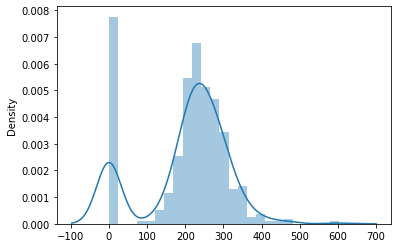

In [ ]:
sns.distplot(pandas_pd)